In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/datathon/drug_overdose.csv
/kaggle/input/datathon/Drug_overdose_death_rates__by_drug_type__sex__age__race__and_Hispanic_origin__United_States_20240518.xlsx


In [2]:
df = pd.read_excel('/kaggle/input/datathon/Drug_overdose_death_rates__by_drug_type__sex__age__race__and_Hispanic_origin__United_States_20240518.xlsx')

In [3]:
df.head()

,INDICATOR,PANEL,PANEL_NUM,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,FLAG
0,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,1999,1,All ages,1.1,6.1,NaN
1,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,2000,2,All ages,1.1,6.2,NaN
2,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,2001,3,All ages,1.1,6.8,NaN
3,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,2002,4,All ages,1.1,8.2,NaN
4,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,2003,5,All ages,1.1,8.9,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6228 entries, 0 to 6227
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   INDICATOR       6228 non-null   object 
 1   PANEL           6228 non-null   object 
 2   PANEL_NUM       6228 non-null   int64  
 3   UNIT            6228 non-null   object 
 4   UNIT_NUM        6228 non-null   int64  
 5   STUB_NAME       6228 non-null   object 
 6   STUB_NAME_NUM   6228 non-null   int64  
 7   STUB_LABEL      6228 non-null   object 
 8   STUB_LABEL_NUM  6228 non-null   float64
 9   YEAR            6228 non-null   int64  
 10  YEAR_NUM        6228 non-null   int64  
 11  AGE             6228 non-null   object 
 12  AGE_NUM         6228 non-null   float64
 13  ESTIMATE        5117 non-null   float64
 14  FLAG            1111 non-null   object 
dtypes: float64(3), int64(5), object(7)
memory usage: 730.0+ KB


In [5]:
df.shape

(6228, 15)

In [6]:
df.isnull().sum()

INDICATOR            0
PANEL                0
PANEL_NUM            0
UNIT                 0
UNIT_NUM             0
STUB_NAME            0
STUB_NAME_NUM        0
STUB_LABEL           0
STUB_LABEL_NUM       0
YEAR                 0
YEAR_NUM             0
AGE                  0
AGE_NUM              0
ESTIMATE          1111
FLAG              5117
dtype: int64

In [7]:
df.describe()

,PANEL_NUM,UNIT_NUM,STUB_NAME_NUM,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE_NUM,ESTIMATE
count,6228.000000,6228.000000,6228.000000,6228.000000,6228.000000,6228.000000,6228.000000,5117.000000
mean,2.500000,1.578035,3.028902,3.383006,2008.664740,10.664740,1.354913,4.743443
std,1.707962,0.493913,1.447036,1.526819,5.849512,5.849512,0.301459,6.424471
min,0.000000,1.000000,0.000000,0.100000,1999.000000,1.000000,1.100000,0.000000
25%,1.000000,1.000000,2.000000,2.100000,2004.000000,6.000000,1.100000,0.800000
50%,2.500000,2.000000,3.000000,3.220000,2009.000000,11.000000,1.200000,2.100000
75%,4.000000,2.000000,4.000000,4.600000,2014.000000,16.000000,1.600000,6.000000
max,5.000000,2.000000,5.000000,5.930000,2018.000000,20.000000,1.910000,54.300000


In [8]:
df.duplicated().sum()

0

In [9]:
df['FLAG'].unique()

array([nan, '*'], dtype=object)

In [10]:
if 'FLAG' in df.columns:
    df = df.drop('FLAG', axis=1)
else:
    print("Column 'FLAG' not found in DataFrame")

In [11]:
df.columns

Index(['INDICATOR', 'PANEL', 'PANEL_NUM', 'UNIT', 'UNIT_NUM', 'STUB_NAME',
       'STUB_NAME_NUM', 'STUB_LABEL', 'STUB_LABEL_NUM', 'YEAR', 'YEAR_NUM',
       'AGE', 'AGE_NUM', 'ESTIMATE'],
      dtype='object')

In [12]:
unique_counts = df.nunique()

# Print the number of unique elements in each column
for column, count in unique_counts.items():
    print(f'Column {column} has {count} unique elements')

Column INDICATOR has 1 unique elements
Column PANEL has 6 unique elements
Column PANEL_NUM has 6 unique elements
Column UNIT has 2 unique elements
Column UNIT_NUM has 2 unique elements
Column STUB_NAME has 8 unique elements
Column STUB_NAME_NUM has 6 unique elements
Column STUB_LABEL has 52 unique elements
Column STUB_LABEL_NUM has 50 unique elements
Column YEAR has 20 unique elements
Column YEAR_NUM has 20 unique elements
Column AGE has 10 unique elements
Column AGE_NUM has 10 unique elements
Column ESTIMATE has 322 unique elements


In [13]:
unique_stub = df['STUB_LABEL'].unique()
for i in unique_stub:
    print(i, end="\n")

All persons
Male
Female
Male: White
Male: Black or African American
Male: American Indian or Alaska Native
Male: Asian or Pacific Islander
Female: White
Female: Black or African American
Female: American Indian or Alaska Native
Female: Asian or Pacific Islander
Male: Hispanic or Latino: All races
Male: Not Hispanic or Latino: White
Male: Not Hispanic or Latino: Black
Male: Not Hispanic or Latino: American Indian or Alaska Native
Male: Not Hispanic or Latino: Asian or Pacific Islander
Female: Hispanic or Latino: All races
Female: Not Hispanic or Latino: White
Female: Not Hispanic or Latino: Black
Female: Not Hispanic or Latino: American Indian or Alaska Native
Female: Not Hispanic or Latino: Asian or Pacific Islander
Under 15 years
15-24 years
25-34 years
35-44 years
45-54 years
55-64 years
65-74 years
75-84 years
85 years and over
Male: Under 15 years
Male: 15-24 years
Male: 25-34 years
Male: 35-44 years
Male: 45-54 years
Male: 55-64 years
Male: 65-74 years
Male: 75-84 years
Male: 85 y

In [14]:
df['ESTIMATE'].fillna(df['ESTIMATE'].median(), inplace=True)

/tmp/ipykernel_33/1984560163.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ESTIMATE'].fillna(df['ESTIMATE'].median(), inplace=True)


In [15]:
unique_age = df['AGE'].unique()
for i in unique_age:
    print(i, end="\n")

All ages
Under 15 years
15-24 years
25-34 years
35-44 years
45-54 years
55-64 years
65-74 years
75-84 years
85 years and over


In [16]:
unique_panel = df['PANEL'].unique()
for i in unique_panel:
    print(i, end="\n")

All drug overdose deaths
Drug overdose deaths involving any opioid
Drug overdose deaths involving natural and semisynthetic opioids
Drug overdose deaths involving methadone
Drug overdose deaths involving other synthetic opioids (other than methadone)
Drug overdose deaths involving heroin


In [17]:
unique_stub_name = df['STUB_NAME'].unique()
for i in unique_stub_name :
    print(i, end="\n")

Total
Sex
Sex and race
Sex and race and Hispanic origin
Age
Sex and age
Sex and race (single race)
Sex and race and Hispanic origin (single race)


In [18]:
unique_stub_name_num = df['STUB_NAME_NUM'].unique()
for i in unique_stub_name_num :
    print(i, end="\n")

0
2
4
5
1
3


In [19]:
g = df.groupby(df['STUB_NAME'])['STUB_NAME_NUM']

for stubname, group in g:
    print(f"stubname: {df['STUB_NAME']}")
    print(f"stubnamenum: {list(group)}")
    print()

stubname: 0             Total
1             Total
2             Total
3             Total
4             Total
           ...     
6223    Sex and age
6224    Sex and age
6225    Sex and age
6226    Sex and age
6227    Sex and age
Name: STUB_NAME, Length: 6228, dtype: object
stubnamenum: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [20]:
print(g)

In [21]:
df.to_csv('drug_overdose.csv', index=False)

In [22]:
def detect_outliers_all_columns(df):
    outliers = {}
    for column in df.select_dtypes(include=[float, int]).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Check for outliers in all numeric columns
outliers_all_columns = detect_outliers_all_columns(df)

for column, outliers in outliers_all_columns.items():
    print(f"Outliers in {column}:")
    print(outliers)
    print()

Outliers in PANEL_NUM:
Empty DataFrame
Columns: [INDICATOR, PANEL, PANEL_NUM, UNIT, UNIT_NUM, STUB_NAME, STUB_NAME_NUM, STUB_LABEL, STUB_LABEL_NUM, YEAR, YEAR_NUM, AGE, AGE_NUM, ESTIMATE]
Index: []

Outliers in UNIT_NUM:
Empty DataFrame
Columns: [INDICATOR, PANEL, PANEL_NUM, UNIT, UNIT_NUM, STUB_NAME, STUB_NAME_NUM, STUB_LABEL, STUB_LABEL_NUM, YEAR, YEAR_NUM, AGE, AGE_NUM, ESTIMATE]
Index: []

Outliers in STUB_NAME_NUM:
Empty DataFrame
Columns: [INDICATOR, PANEL, PANEL_NUM, UNIT, UNIT_NUM, STUB_NAME, STUB_NAME_NUM, STUB_LABEL, STUB_LABEL_NUM, YEAR, YEAR_NUM, AGE, AGE_NUM, ESTIMATE]
Index: []

Outliers in STUB_LABEL_NUM:
Empty DataFrame
Columns: [INDICATOR, PANEL, PANEL_NUM, UNIT, UNIT_NUM, STUB_NAME, STUB_NAME_NUM, STUB_LABEL, STUB_LABEL_NUM, YEAR, YEAR_NUM, AGE, AGE_NUM, ESTIMATE]
Index: []

Outliers in YEAR:
Empty DataFrame
Columns: [INDICATOR, PANEL, PANEL_NUM, UNIT, UNIT_NUM, STUB_NAME, STUB_NAME_NUM, STUB_LABEL, STUB_LABEL_NUM, YEAR, YEAR_NUM, AGE, AGE_NUM, ESTIMATE]
Index: []

Ou

In [23]:
df_num = df.select_dtypes(include=['int64', 'float64'])

print(df_num.head())

   PANEL_NUM  UNIT_NUM  STUB_NAME_NUM  STUB_LABEL_NUM  YEAR  YEAR_NUM  \
0          0         1              0             0.1  1999         1   
1          0         1              0             0.1  2000         2   
2          0         1              0             0.1  2001         3   
3          0         1              0             0.1  2002         4   
4          0         1              0             0.1  2003         5   

   AGE_NUM  ESTIMATE  
0      1.1       6.1  
1      1.1       6.2  
2      1.1       6.8  
3      1.1       8.2  
4      1.1       8.9  


In [24]:
correlation_matrix = df_num.corr()

death_rate_correlation = correlation_matrix['ESTIMATE']
print(death_rate_correlation)

PANEL_NUM        -0.464661
UNIT_NUM          0.034085
STUB_NAME_NUM    -0.028451
STUB_LABEL_NUM   -0.049448
YEAR              0.274297
YEAR_NUM          0.274297
AGE_NUM          -0.017426
ESTIMATE          1.000000
Name: ESTIMATE, dtype: float64


Negative Correlation with PANEL_NUM:
Higher PANEL_NUM values tend to correlate with lower death rates.
Indicates certain categories or submeasures might be associated with lower death rates.

Weak Positive Correlation with UNIT_NUM, STUB_NAME_NUM, and STUB_LABEL_NUM:
Minimal impact of UNIT_NUM, STUB_NAME_NUM, and STUB_LABEL_NUM on death rates.
Changes in these factors have slight tendencies to affect death rates.

Moderate Positive Correlation with YEAR and YEAR_NUM:
Death rates tend to increase over time.
Indicates a potential trend of increasing death rates with each passing year.

Weak Negative Correlation with AGE_NUM:
Minimal impact of age groups on death rates.
Changes in age groups have minimal effects on death rates.

In [25]:
opioid_data = df[df['PANEL'] == 'Drug overdose deaths involving any opioid']

opioid_data.head()

,INDICATOR,PANEL,PANEL_NUM,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE
987,Drug overdose death rates,Drug overdose deaths involving any opioid,1,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,1999,1,All ages,1.1,2.9
988,Drug overdose death rates,Drug overdose deaths involving any opioid,1,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,2000,2,All ages,1.1,3.0
989,Drug overdose death rates,Drug overdose deaths involving any opioid,1,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,2001,3,All ages,1.1,3.3
990,Drug overdose death rates,Drug overdose deaths involving any opioid,1,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,2002,4,All ages,1.1,4.1
991,Drug overdose death rates,Drug overdose deaths involving any opioid,1,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,2003,5,All ages,1.1,4.5


In [26]:
opioid_data.shape

(1038, 14)

In [27]:
grouped_data = opioid_data.groupby('AGE')

death_rates = grouped_data['ESTIMATE'].sum() / grouped_data['ESTIMATE'].count()

In [28]:
death_rates

AGE
15-24 years           5.098333
25-34 years          12.313333
35-44 years          13.408333
45-54 years          13.291667
55-64 years           7.423333
65-74 years           2.115000
75-84 years           0.870000
85 years and over     1.261667
All ages              6.032932
Under 15 years        0.368333
Name: ESTIMATE, dtype: float64

Age groups between 25-44 years show the highest death rates.

Older adults, particularly those aged 65-84 years, have lower rates of opioid-related deaths compared to younger age groups.

Young adults aged 15-24 years exhibit relatively high death rates compared to older age groups.

The overall age-adjusted death rate for opioid-related deaths, represented by 'All ages', is 6.03 per 100,000 population.

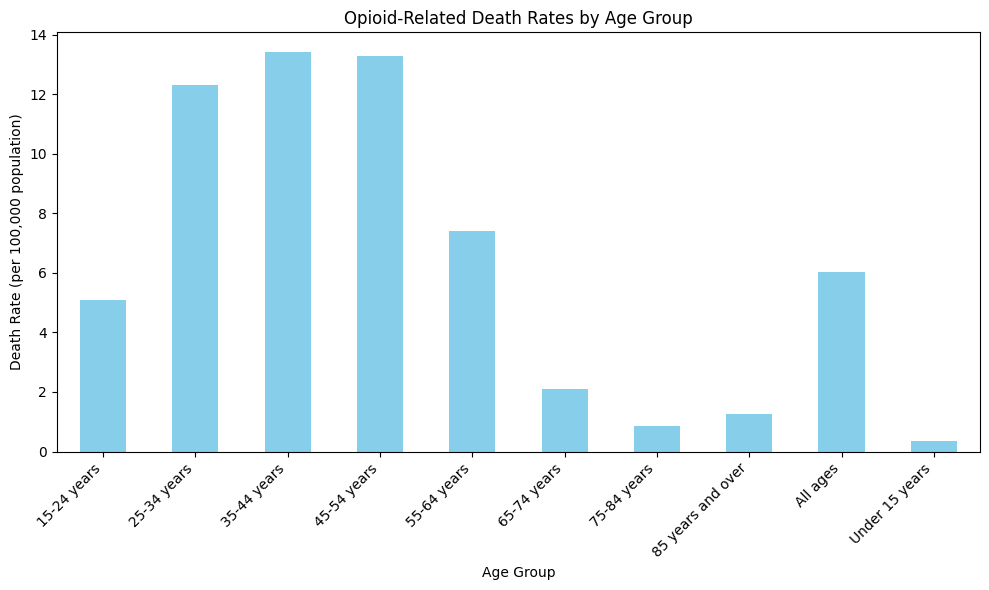

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
death_rates.plot(kind='bar', color='skyblue')
plt.title('Opioid-Related Death Rates by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Death Rate (per 100,000 population)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

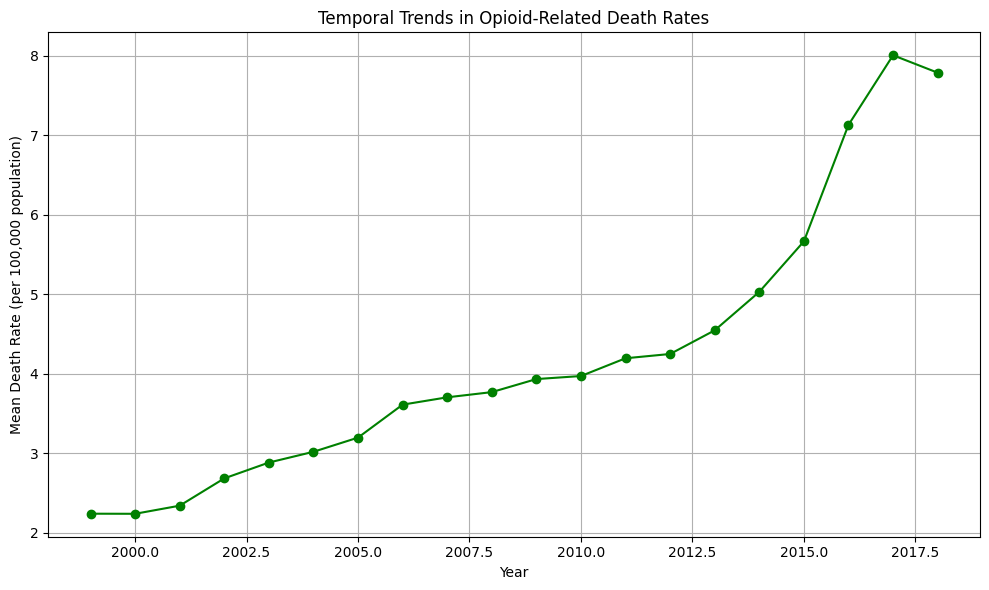

In [30]:
yearly_death_rates = df.groupby('YEAR')['ESTIMATE'].mean()

plt.figure(figsize=(10, 6))
yearly_death_rates.plot(marker='o', color='green')
plt.title('Temporal Trends in Opioid-Related Death Rates')
plt.xlabel('Year')
plt.ylabel('Mean Death Rate (per 100,000 population)')
plt.grid(True)
plt.tight_layout()
plt.show()

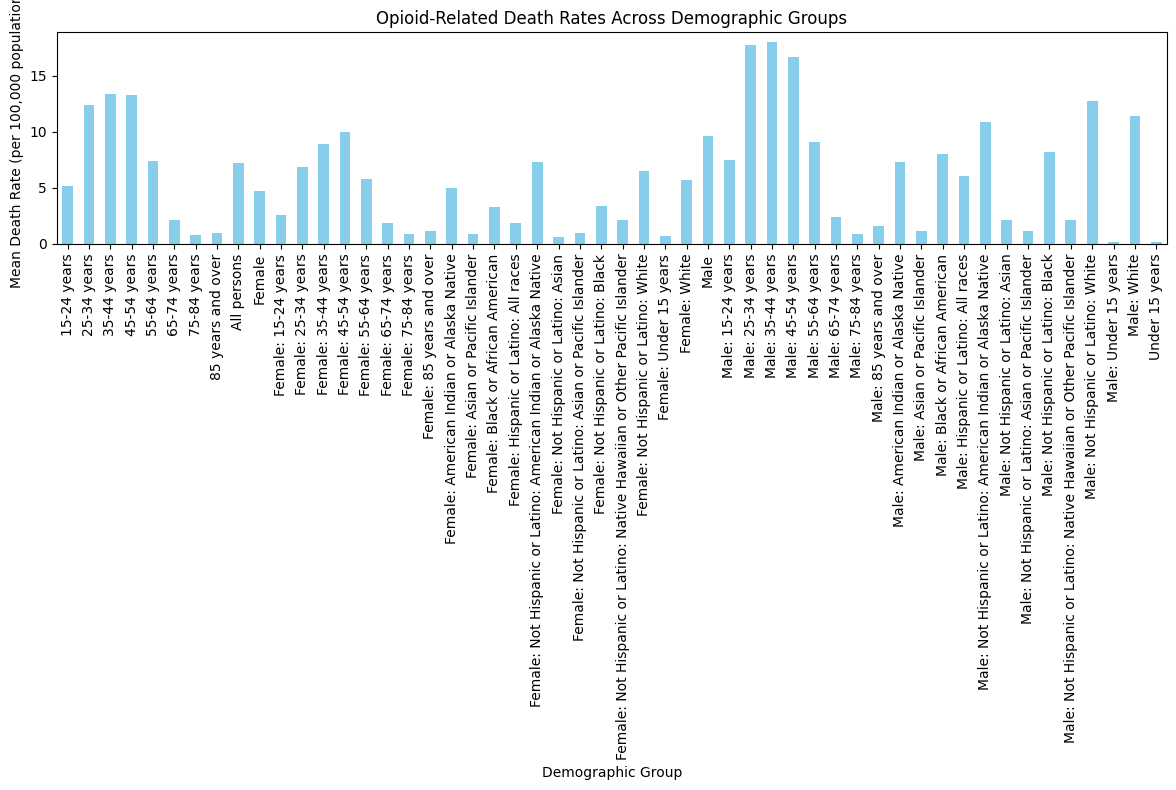

In [31]:
grouped_data = opioid_data.groupby('STUB_LABEL')
death_rates = grouped_data['ESTIMATE'].mean()

# Plotting the comparison of opioid-related death rates across demographic groups
plt.figure(figsize=(12, 8))
death_rates.plot(kind='bar', color='skyblue')
plt.title('Opioid-Related Death Rates Across Demographic Groups')
plt.xlabel('Demographic Group')
plt.ylabel('Mean Death Rate (per 100,000 population)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()